# Trung Vo's Homework Session 4

## Part 1. **Tokenization**

### Let's write an elementary tokenizer that uses words as tokens.

We will use Mark Twain's _Life On The Mississippi_ as a test bed. The text is in the accompanying file 'Life_On_The_Mississippi.txt'

Here's a not-terribly-good such tokenizer:

In [1]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('\ufeffThe', 1)
('Project', 79)
('Gutenberg', 22)
('eBook', 4)
('of', 4469)
('Life', 5)
('on', 856)
('the', 8443)
('Mississippi', 104)
('This', 127)
('ebook', 2)
('is', 1076)
('for', 1017)
('use', 34)
('anyone', 4)
('anywhere', 8)
('in', 2381)
('United', 36)
('States', 26)
('and', 5692)
('most', 119)
('other', 223)
('parts', 5)
('world', 40)
('at', 676)
('no', 325)
('cost', 18)
('with', 1053)
('almost', 37)
('restrictions', 2)
('whatsoever.', 2)
('You', 92)
('may', 85)
('copy', 12)
('it,', 199)
('give', 67)
('it', 1382)
('away', 107)
('or', 561)
('re-use', 2)
('under', 112)
('terms', 22)
('License', 8)
('included', 2)
('this', 591)
('online', 4)
('www.gutenberg.org.', 4)
('If', 85)
('you', 813)
('are', 361)
('not', 680)
('located', 9)
('States,', 8)
('will', 287)
('have', 557)
('to', 3518)
('check', 4)
('laws', 13)
('country', 50)
('where', 152)
('before', 150)
('using', 10)
('eBook.', 2)
('Title:', 1)
('Author:', 1)
('Mark', 2)
('Twain', 2)
('Release', 1)
('date:', 1)
('July', 7)
('1

This is unsatisfactory for a few reasons:

* There are non-ASCII (Unicode) characters that should be stripped (the so-called "Byte-Order Mark" or BOM \ufeff at the beginning of the text);

* There are punctuation marks, which we don't want to concern ourselves with;

* The same word can appear capitalized, or lower-case, or with its initial letter upper-cased, whereas we want them all to be normalized to lower-case.

Part 1 of this assignment: insert code in this loop to operate on the str variable 'line' so as to fix these problems before 'line' is split into words.

A hint to one possible way to do this: use the 'punctuation' character definition in the Python 'string' module, the 'maketrans' and 'translate' methods of Python's str class, to eliminate punctuation, and the regular expression ('re') Python module to eliminate any Unicode---it is useful to know that the regular expression r'[^\x00-x7f]' means "any character not in the vanilla ASCII set.

Part 2: Add code to sort the contents of wdict by word occurrence frequency.  What are the top 100 most frequent word tokens?  Adding up occurrence frequencies starting from the most frequent words, how many distinct words make up the top 90% of word occurrences in this "corpus"?

For this part, the docs of Python's 'sorted' and of the helper 'itemgetter' from 'operator' reward study.

Write your modified code in the cell below.

# Answer

In [2]:
import string
import re
from collections import Counter

# Part 1 -- remove punctuations and Unicode
punctuations = string.punctuation
translation = str.maketrans(punctuations, str((" ")*len(punctuations)))

wdict = Counter()
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:
        line = line.translate(translation)
        line = re.sub(r"[^\x00-x7f]", "", line)
        words = line.split()
        for word in words:
            wdict[word.lower()] += 1 # normalized to lower-case
        line = L.readline()
        nlines += 1

# Part 2 -- sort the contents of wdict by word occurrence frequency
print("Top 100 most frequent word tokens: \n", [k for k, _ in wdict.most_common(100)])
threshold = 0.9 * sum(wdict.values()) # 90% of word occurences
count = 0
total_occurence = 0
for _, v in wdict.most_common():
    count += 1
    total_occurence += v
    if total_occurence >= threshold:
        break
print("\n{0} distinct words make up for the top 90% of word occurences in this corpus".format(count))

Top 100 most frequent word tokens: 
 ['the', 'and', 'of', 'a', 'to', 'in', 'it', 'i', 'was', 'that', 'he', 'is', 'for', 'with', 'ou', 'but', 'his', 'on', 'had', 'as', 'this', 'b', 'at', 'all', 'not', 'one', 's', 'an', 'there', 'be', 'were', 'm', 'or', 'from', 'have', 'so', 'out', 'we', 'up', 'me', 'him', 'when', 'river', 'which', 'would', 't', 'no', 'them', 'then', 'man', 'said', 'are', 'if', 'now', 'their', 'time', 'about', 'down', 'been', 'ever', 'could', 'what', 'has', 'two', 'will', 'into', 'her', 'our', 'its', 'other', 'some', 'do', 'new', 'water', 'she', 'more', 'boat', 'got', 'these', 'who', 'can', 'da', 'wa', 'did', 'before', 'here', 'over', 'hundred', 'well', 'old', 'upon', 'after', 'pilot', 'good', 'through', 'than', 'get', 'never', 'went', 'see']

3028 distinct words make up for the top 90% of word occurences in this corpus


## Part 2. **Embedding**

Modify the embedding visualization code to zoom in on various regions of the projections, and identify at least one interesting cluster of tokens.

**Answer** at the bottom

In [3]:
# Administrivia: modify this notebook so output text wraps.
from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <style>
    pre {
      white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# Set various proxies to download models and data
# !export HTTP_PROXY="http://proxy-01.pub.alcf.anl.gov:3128"
# !export HTTPS_PROXY="http://proxy-01.pub.alcf.anl.gov:3128"
# !export http_proxy="http://proxy-01.pub.alcf.anl.gov:3128"
# !export https_proxy="http://proxy-01.pub.alcf.anl.gov:3128"
# !export ftp_proxy="http://proxy-01.pub.alcf.anl.gov:3128" 

In [4]:
from transformers import pipeline

# In this framework, setting  up a "pipeline" involves selecting a (pre-trained) model,
# and a task---in this case, text generation 
generator = pipeline("text-generation", model='gpt2')

prompt = "I'm late because"

# We request 5 completions of the prompt, of length 25 words
res = generator(prompt, max_length=25, num_return_sequences=5)

# What did we get?
for each in res:
    print(each['generated_text'])
    print('******************"')

2024-03-31 23:11:11.091618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/soft/datascience/conda/2023-01-10/mconda3/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
/soft/datascience/conda/2023-01-10/mconda3/lib/python3.10/site-packages/transformers/generation/utils.py:1186: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://hugg

I'm late because I had planned to meet you yesterday, but here I am. I'm going to go meet you now
******************"
I'm late because I have to do this, I have to pay you," he said after the game. "It's
******************"
I'm late because my sister has died and I cannot sleep. I'm also late because I have a baby son. I
******************"
I'm late because I've got a couple of hours off now. It's really time for us to start working up that
******************"
I'm late because of you, your little kid" — one of the two characters in the video below, which is available
******************"


Huh. These seem pretty random.  What happens if we predict a single sentence, but extend its length?

In [5]:
res = generator(prompt, max_length=100, num_return_sequences=1)
print(res[0]['generated_text'])
print('******************"')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I'm late because I can't see where you are right now. I can't tell what happens to you until we have to go to work."

He is a member of the team's management committee. "I'm really proud of how we did it," says Mr. Sirotkin.

With more than 60 players from 17 different countries taking part in the World Cup, it's possible that some will be playing this summer, but it's extremely unlikely.

"
******************"


In [6]:
from transformers import AutoTokenizer

# A utility function to tokenize a sequence and print out some information about it.

def tokenization_summary(tokenizer, sequence):

    # get the vocabulary
    vocab = tokenizer.vocab
    # Number of entries to print
    n = 10

    # Print subset of the vocabulary
    print("Subset of tokenizer.vocab:")
    for i, (token, index) in enumerate(tokenizer.vocab.items()):
        print(f"{token}: {index}")
        if i >= n - 1:
            break

    print("Vocab size of the tokenizer = ", len(vocab))
    print("------------------------------------------")

    # .tokenize chunks the existing sequence into different tokens based on the rules and vocab of the tokenizer.
    tokens = tokenizer.tokenize(sequence)
    print("Tokens : ", tokens)
    print("------------------------------------------")

    # .convert_tokens_to_ids or .encode or .tokenize converts the tokens to their corresponding numerical representation.
    #  .convert_tokens_to_ids has a 1-1 mapping between tokens and numerical representation
    # ids = tokenizer.convert_tokens_to_ids(tokens)
    # print("encoded Ids: ", ids)

    # .encode also adds additional information like Start of sequence tokens and End of sequene
    print("tokenized sequence : ", tokenizer.encode(sequence))

    # .tokenizer has additional information about attention_mask.
    # encode = tokenizer(sequence)
    # print("Encode sequence : ", encode)
    # print("------------------------------------------")

    # .decode decodes the ids to raw text
    ids = tokenizer.convert_tokens_to_ids(tokens)
    decode = tokenizer.decode(ids)
    print("Decode sequence : ", decode)


tokenizer_1  =  AutoTokenizer.from_pretrained("gpt2") # GPT-2 uses "Byte-Pair Encoding (BPE)"

sequence = "Counselor, please adjust your Zoom filter to appear as a human, rather than as a cat"

tokenization_summary(tokenizer_1, sequence)


Subset of tokenizer.vocab:
bench: 26968
Ġfundra: 12663
Ġdenounce: 38639
Ġsignalling: 45829
Ġemptied: 46705
li: 4528
Ġdoub: 3385
Ġinnocence: 24211
Ġ217: 24894
DIS: 26288
Vocab size of the tokenizer =  50257
------------------------------------------
Tokens :  ['Coun', 'sel', 'or', ',', 'Ġplease', 'Ġadjust', 'Ġyour', 'ĠZoom', 'Ġfilter', 'Ġto', 'Ġappear', 'Ġas', 'Ġa', 'Ġhuman', ',', 'Ġrather', 'Ġthan', 'Ġas', 'Ġa', 'Ġcat']
------------------------------------------
tokenized sequence :  [31053, 741, 273, 11, 3387, 4532, 534, 40305, 8106, 284, 1656, 355, 257, 1692, 11, 2138, 621, 355, 257, 3797]
Decode sequence :  Counselor, please adjust your Zoom filter to appear as a human, rather than as a cat


In [7]:
tokenizer_2  =  AutoTokenizer.from_pretrained("bert-base-cased") # BERT uses WordPiece encoding

tokenization_summary(tokenizer_2, sequence)


Subset of tokenizer.vocab:
tubes: 11182
##ble: 2165
##500: 22682
##los: 8867
AMC: 24810
engineering: 3752
##nge: 12377
##iz: 9368
ο: 432
##hine: 17108
Vocab size of the tokenizer =  28996
------------------------------------------
Tokens :  ['Counsel', '##or', ',', 'please', 'adjust', 'your', 'Zoo', '##m', 'filter', 'to', 'appear', 'as', 'a', 'human', ',', 'rather', 'than', 'as', 'a', 'cat']
------------------------------------------
tokenized sequence :  [101, 18645, 1766, 117, 4268, 14878, 1240, 13899, 1306, 12123, 1106, 2845, 1112, 170, 1769, 117, 1897, 1190, 1112, 170, 5855, 102]
Decode sequence :  Counselor, please adjust your Zoom filter to appear as a human, rather than as a cat


In [8]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
#model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='.')

print("The vocabulary size is: ", model.config.vocab_size) # Size of the vocabulary


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The vocabulary size is:  30522


In [9]:
# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)


(30522, 1024)


So the array bertwordembs contains 30522 vectors of size 1024, the latter being the dimension of the embedding space.

The visualization of this data will be carried out by means of a projection to 2 dimensions by an algorithm called "t-SNE" ("t-distributed stochastic neighbor embedding"), which attempts to keep "similar" (in the high-dimensional space) points together, while spreading apart in the 2-dimensional projection points that are distant from each other in the high-dimensional space.

In [10]:
# Read in the vocabulary
filename = "vocab.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
bert_char_indices_to_use = np.arange(999, 1063, 1)
bert_voc_indices_to_plot = np.append(bert_char_indices_to_use, np.arange(1996, 5932, 1))
bert_voc_indices_to_use = np.append(bert_char_indices_to_use, np.arange(1996, 11932, 1))

bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot))
print(len(bert_voc_indices_to_use))

4000
10000


That is to say, 10000 words will be used to compute the t-SNE data, but only 4000 of them will be plotted. We're ready to run the t-SNE projection.

In [11]:
# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 1.320s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.267747
[t-SNE] Computed conditional probabilities in 0.177s
[t-SNE] Iteration 50: error = 97.8582916, gradient norm = 0.0063876 (50 iterations in 0.565s)
[t-SNE] It

<function matplotlib.pyplot.show(close=None, block=None)>

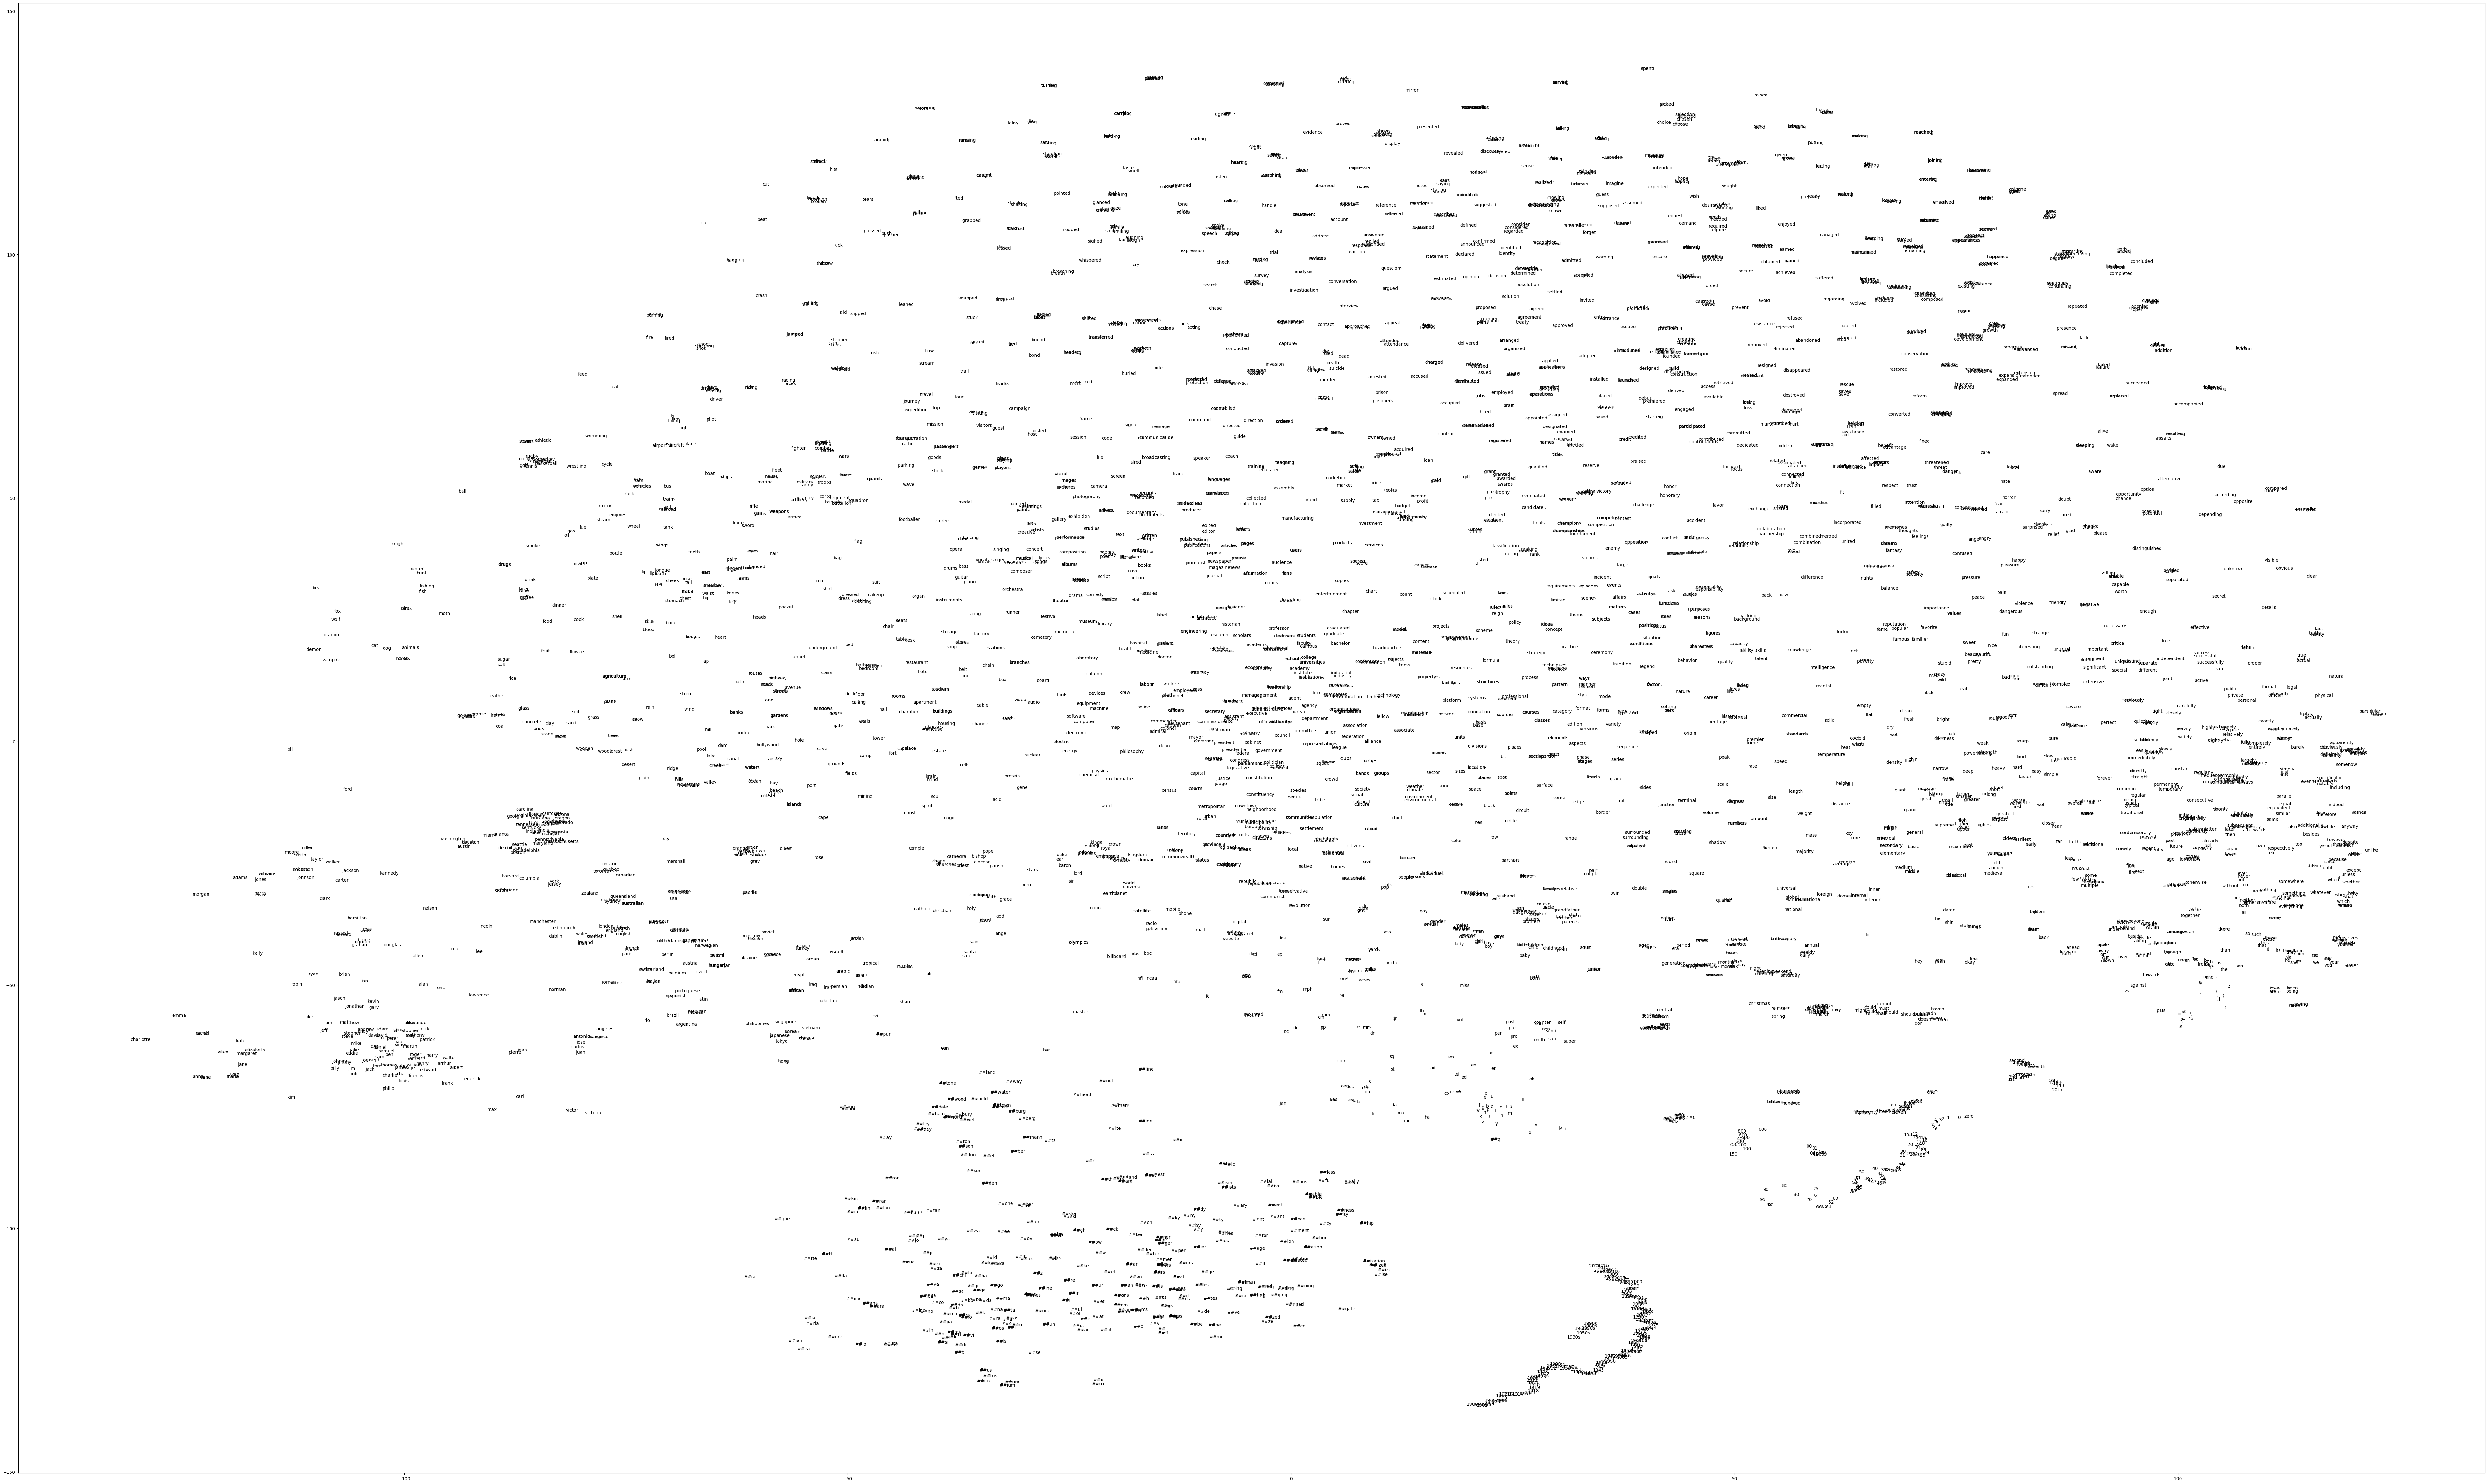

In [19]:
# Plot the transformed BERT vocabulary embeddings:
fig = plt.figure()
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    alltexts.append(currtext)
    

# Save the plot before adjusting.
plt.savefig('viz-bert-voc-tsne10k-viz4k-noadj.pdf', format='pdf')
plt.show

All the number are cluster together

<function matplotlib.pyplot.show(close=None, block=None)>

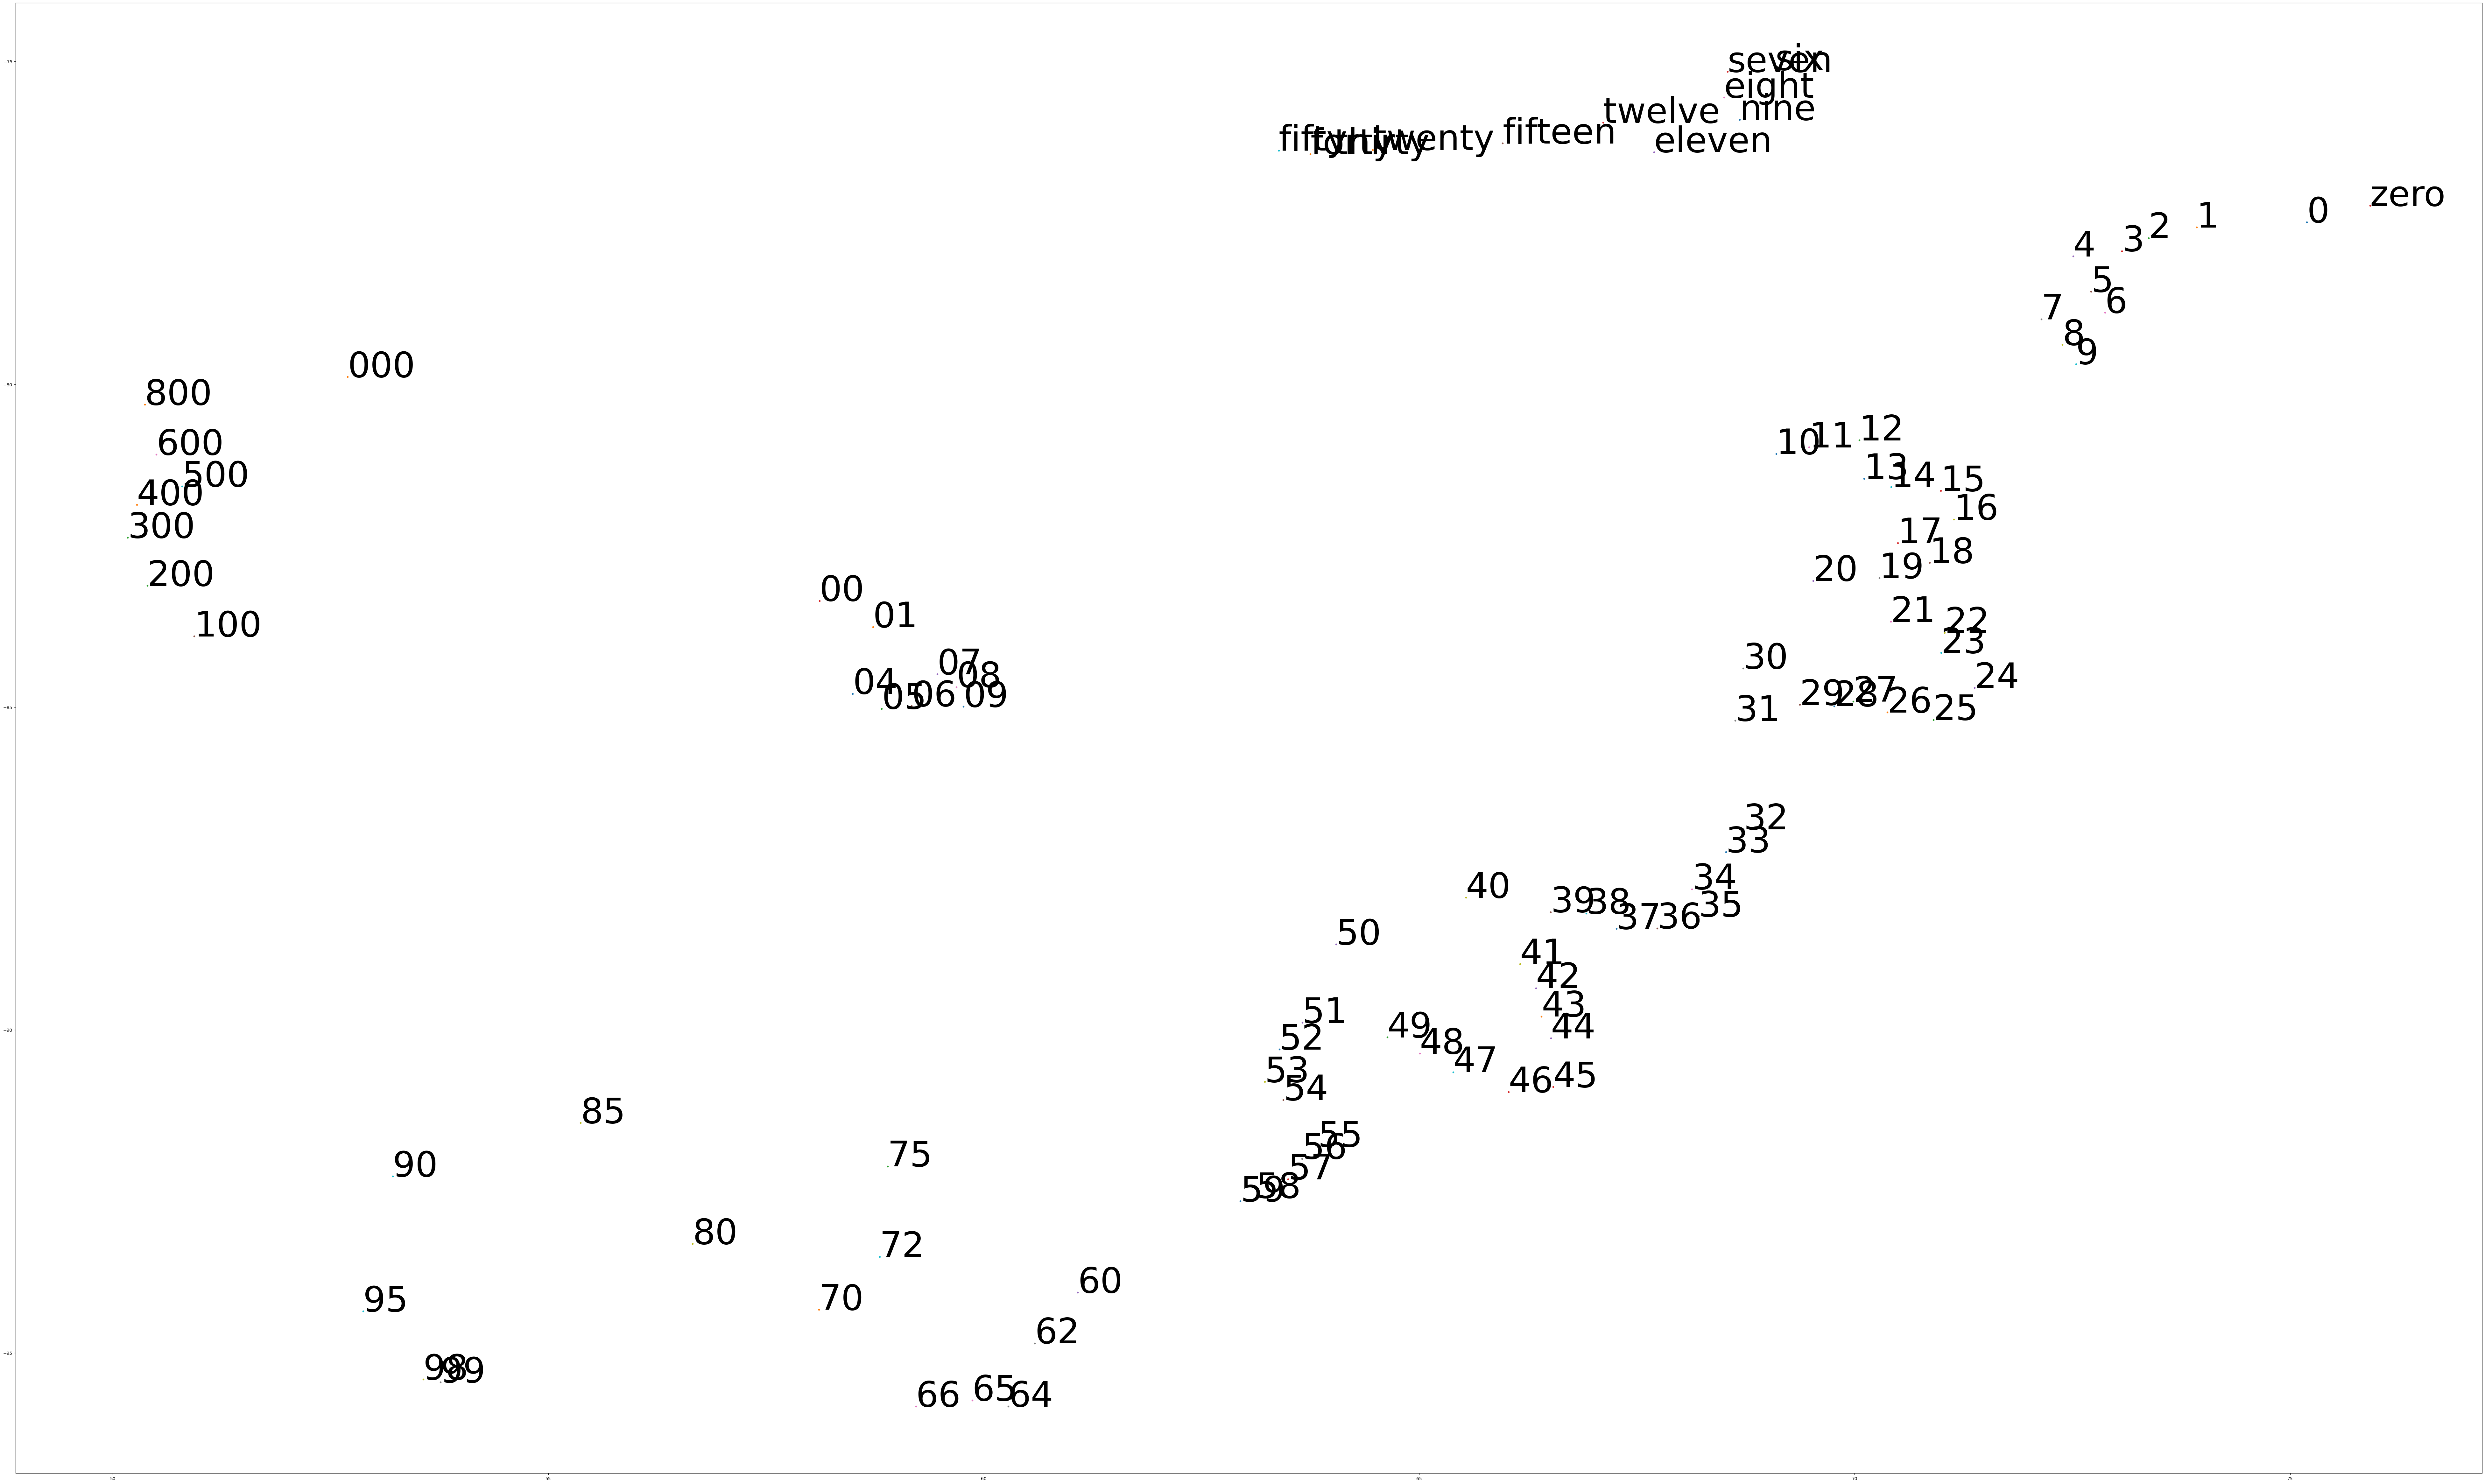

In [21]:
# Plot the transformed BERT vocabulary embeddings:
fig = plt.figure()
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    if 50 < bert_word_embs_to_use_tsne[i,0] < 100 and -100 < bert_word_embs_to_use_tsne[i,1] < -75:
        plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=9)
        currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif', fontsize= 80)
        alltexts.append(currtext)

# Save the plot before adjusting.
plt.savefig('viz-bert-voc-tsne10k-viz4k-noadj-zoom.pdf', format='pdf')
plt.show